In [1]:
# opencv kütüphanesini içe aktaralım
import cv2
# numpy kütüphanesini içe aktaralım
import numpy as np
# matplotlib kütüphanesini içe aktaralım
import matplotlib.pyplot as plt

(<matplotlib.image.AxesImage at 0x7f50737ad570>, (-0.5, 1199.5, 799.5, -0.5))

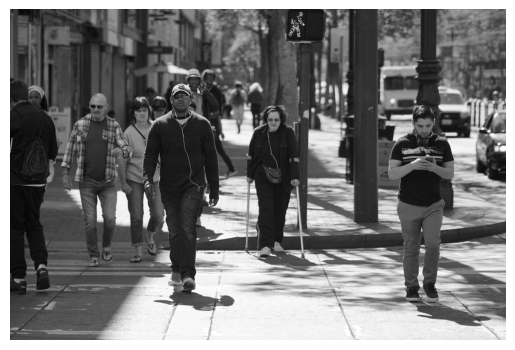

In [2]:
# resmi siyah beyaz olarak içe aktaralım resmi çizdirelim
img = cv2.imread('image.jpg', 0)
plt.imshow(img, cmap='gray'), plt.axis("off")

(<matplotlib.image.AxesImage at 0x7f50736245b0>,
 Text(0.5, 1.0, 'Edge Detection'),
 (-0.5, 1199.5, 799.5, -0.5))

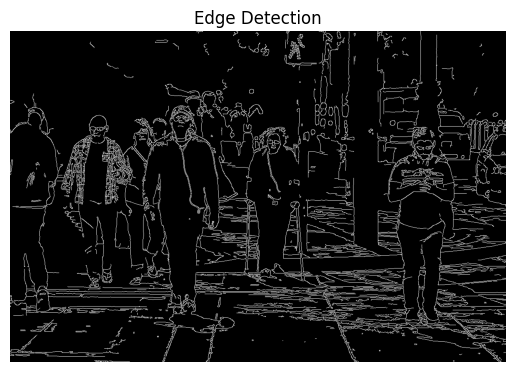

In [3]:
# resim üzerinde bulunan kenarları tespit edelim ve görselleştirelim edge detection
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges, cmap='gray'), plt.title('Edge Detection'), plt.axis('off')

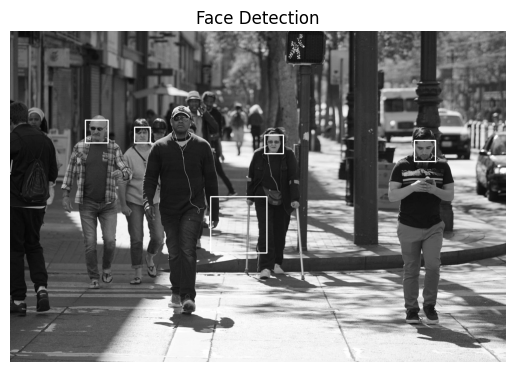

In [4]:
# yüz tespiti için gerekli haar cascade'i içe aktaralım
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# yüz tespiti yapıp sonuçları görselleştirelim
faces = face_cascade.detectMultiScale(img, minNeighbors=10)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    plt.imshow(img, cmap="gray"), plt.title('Face Detection'), plt.axis('off')

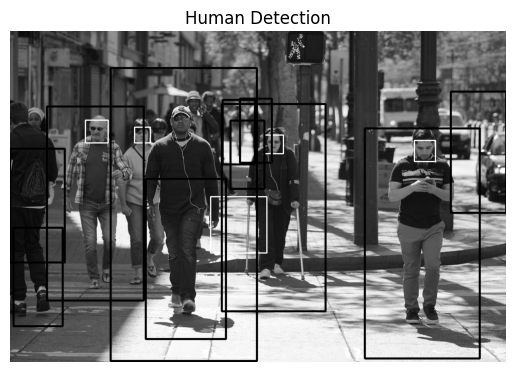

In [5]:
# HOG tanımlayıcısı
hog = cv2.HOGDescriptor()
# insan tespiti algoritmamızı çağıralım ve svm'i set edelim
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
# resme insan tespiti algoritmamızı uygulayalım ve görselleştirelim
(rects, weights) = hog.detectMultiScale(img, winStride=(4, 4), padding=(8, 8), scale=1.05)
for (x, y, w, h) in rects:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 4)
    plt.imshow(img, cmap="gray"), plt.title('Human Detection'), plt.axis('off')